IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

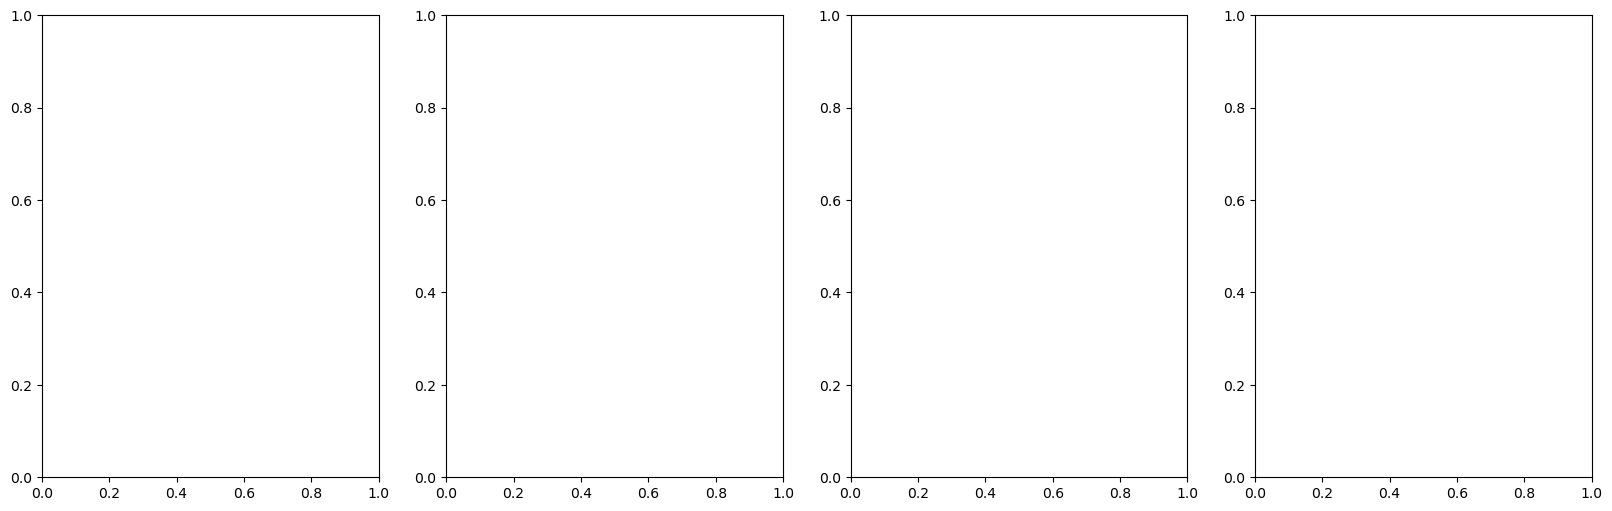

In [28]:
import torch
import matplotlib.pyplot as plt

from pmath import pair_wise_hyp, pair_wise_eud

def hyperbolic_distance(x, y, c):
    return torch.arctanh(torch.linalg.norm(x - y) / (1 + c * torch.linalg.norm(x - y)**2))

def plot_distances(ax, c):
    x = torch.arange(-1, 1, 0.01).reshape(-1, 1)
    y = torch.arange(-1, 1, 0.01).reshape(-1, 1)

    euclidean_distances = pair_wise_eud(x, y)
    euclidean_distances = euclidean_distances.reshape(-1)
    print(euclidean_distances.shape)

    sort_idx = torch.argsort(euclidean_distances, dim=1)

    # Calculate hyperbolic distances for different values of c
    # hyperbolic_distances = np.arctanh(
        # (euclidean_distances / (1 + c * euclidean_distances**2))
    # )
    hyperbolic_distances = pair_wise_hyp(x, y, c)
    hyperbolic_distances = hyperbolic_distances.reshape(-1)
    print(hyperbolic_distances.shape)
    
    sort_euclidean = euclidean_distances[sort_idx]
    sort_hyperbolic = hyperbolic_distances[sort_idx]

    print(euclidean_distances.shape, hyperbolic_distances.shape)

    # ax.figure(figsize=(8, 6))
    ax.plot(sort_euclidean, sort_hyperbolic)
    ax.set_xlabel('Euclidean distance')
    ax.set_ylabel('Hyperbolic distance')
    ax.set_title('(c = {:.2f})'.format(c))
    # ax.set_colorbar()

_, axes = plt.subplots(1, 4, figsize=(20, 6))
for i, c in enumerate([0.01, 0.1, 1, 10]):
    plot_distances(axes[i], c)